# Uncertainties associated - 1906 case
Javiera Álvarez, 2024.

The number of qualitative and quantitative data recorded for each seismic event determines the number of models that pass all restriction filters. This leads to the question of which of these models most accurately represents the specific event. To address this, we take into account the uncertainties inherent in all models for the 1730, 1906 and 1985 earthquakes that have gone through the restriction process. 

### Mean and STD on each point of data

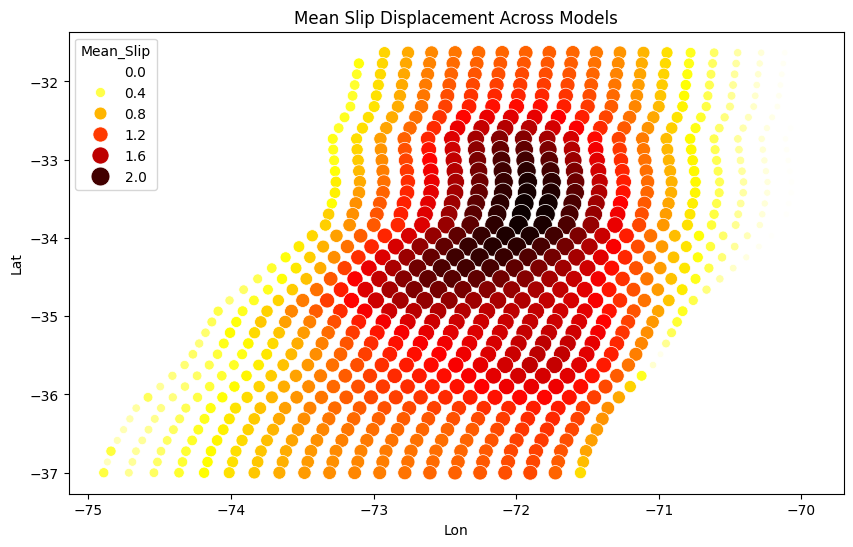

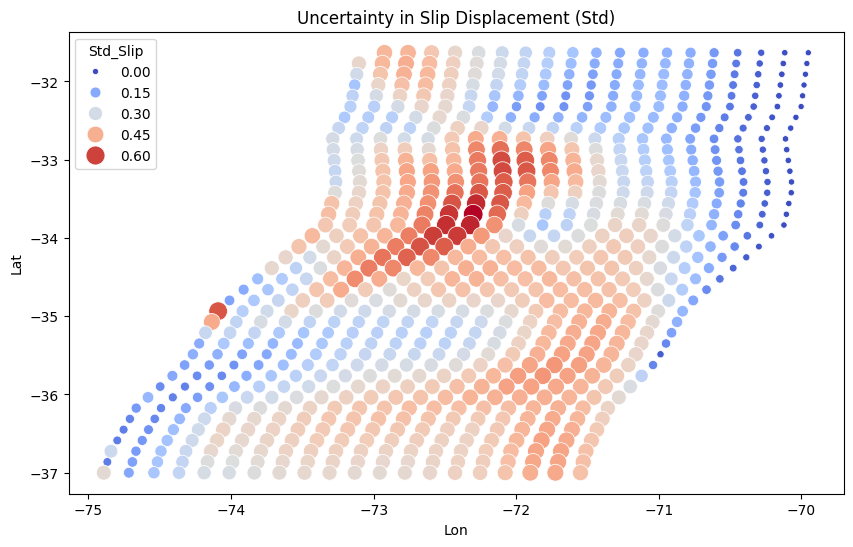

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Constrained .CSV files
# Note: A for-loop could be implemented for processing all files in directory
model1 = pd.read_csv('/Users/javieraalvarezvargas/Desktop/modelos/1906/filtrados70_2/slip_126_filtered.csv', header=None)
model2 = pd.read_csv('/Users/javieraalvarezvargas/Desktop/modelos/1906/filtrados70_2/slip_139_filtered.csv', header=None)
model3 = pd.read_csv('/Users/javieraalvarezvargas/Desktop/modelos/1906/filtrados70_2/slip_150_filtered.csv', header=None)
model4 = pd.read_csv('/Users/javieraalvarezvargas/Desktop/modelos/1906/filtrados70_2/slip_216_filtered.csv', header=None)
model5 = pd.read_csv('/Users/javieraalvarezvargas/Desktop/modelos/1906/filtrados70_2/slip_367_filtered.csv', header=None)
model6 = pd.read_csv('/Users/javieraalvarezvargas/Desktop/modelos/1906/filtrados70_2/slip_1030_filtered.csv', header=None)

# slip models
models = np.stack([model1.iloc[:, 2].values, 
                   model2.iloc[:, 2].values, 
                   model3.iloc[:, 2].values, 
                   model4.iloc[:, 2].values, 
                   model5.iloc[:, 2].values, 
                   model6.iloc[:, 2].values])

# Mean and STD on each point of data
mean_slip = np.mean(models, axis=0)
std_slip = np.std(models, axis=0)

# lat and lon extract
lat = model1.iloc[:, 1].values  # Lat
lon = model1.iloc[:, 0].values  # Lon

# We create a DataFrame with the data
slip_df = pd.DataFrame({
    'Lon': lon,
    'Lat': lat,
    'Mean_Slip': mean_slip,
    'Std_Slip': std_slip
})


#FIGURES

# mean
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Lon', y='Lat', size='Mean_Slip', hue='Mean_Slip', sizes=(20, 200), 
                palette='hot_r', data=slip_df, legend=True) 
plt.title('Mean Slip Displacement Across Models')
plt.savefig('MEAN_1906.png', dpi=300, bbox_inches='tight')
plt.show()

# std
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Lon', y='Lat', size='Std_Slip', hue='Std_Slip', sizes=(20, 200), palette='coolwarm', data=slip_df)
plt.title('Uncertainty in Slip Displacement (Std)')
plt.savefig('STD_1906.png', dpi=300, bbox_inches='tight')
plt.show()


El mejor modelo es el modelo 5 con un RMSE de 0.9780


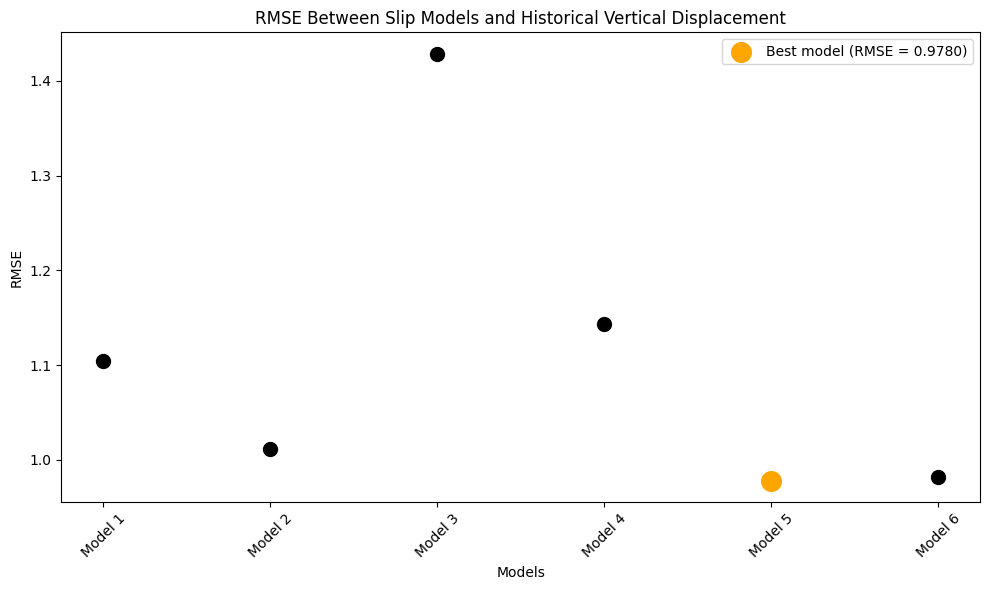

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.interpolate import griddata

# Load deformation data from CSV file 
def_data = pd.read_csv('def_magnitud_1906.csv', delimiter=r"\s+", header=None)

# Extract coordinates and magnitude values
def_lon = def_data.iloc[:, 0].values
def_lat = def_data.iloc[:, 1].values
def_magnitude = def_data.iloc[:, 2].values

# Create array of deformation points coordinates
def_points = np.column_stack((def_lon, def_lat))

# Model input preparation
# Required arrays: 
# - lon: longitude points for slip models
# - lat: latitude points for slip models  
# - models: array of slip values with shape (n_models, n_points)

# Interpolate slip values for each model at deformation points
slip_interpolated = []

for i in range(models.shape[0]):
    slip_interp = griddata((lon, lat), models[i], def_points, method='linear')
    slip_interpolated.append(slip_interp)

# array of interpolate slip
slip_interpolated = np.array(slip_interpolated)

# Calculate RMSE between interpolated slip and observed deformation
rmse_values = []

for i in range(slip_interpolated.shape[0]):
    # Filter out NaN values for valid comparison
    mask = ~np.isnan(slip_interpolated[i]) & ~np.isnan(def_magnitude)
    if mask.sum() > 0:
        rmse = np.sqrt(mean_squared_error(def_magnitude[mask], slip_interpolated[i][mask]))
    else:
        rmse = np.nan 
    rmse_values.append(rmse)

rmse_values = np.array(rmse_values)

# Identify best performing model
best_model_index = np.nanargmin(rmse_values)
best_rmse = rmse_values[best_model_index]

print(f'El mejor modelo es el modelo {best_model_index + 1} con un RMSE de {best_rmse:.4f}')

# Visualization setup
model_labels = [f'Model {i+1}' for i in range(len(rmse_values))]

# Plot RMSE comparison
plt.figure(figsize=(10, 6))
plt.scatter(model_labels, rmse_values, color='black', s=100)
plt.scatter(model_labels[best_model_index], best_rmse, color='orange', s=200, label=f'Best model (RMSE = {best_rmse:.4f})')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE Between Slip Models and Historical Vertical Displacement')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.savefig('RMSE_1906vshistorical.png', dpi=300, bbox_inches='tight')
plt.show()


## Maximum mean and media slip ##

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CSV files

model1 = pd.read_csv('/Users/javieraalvarezvargas/Desktop/modelos/1906/filtrados70_2/slip_126_filtered.csv', header=None)
model2 = pd.read_csv('/Users/javieraalvarezvargas/Desktop/modelos/1906/filtrados70_2/slip_139_filtered.csv', header=None)
model3 = pd.read_csv('/Users/javieraalvarezvargas/Desktop/modelos/1906/filtrados70_2/slip_150_filtered.csv', header=None)
model4 = pd.read_csv('/Users/javieraalvarezvargas/Desktop/modelos/1906/filtrados70_2/slip_216_filtered.csv', header=None)
model5 = pd.read_csv('/Users/javieraalvarezvargas/Desktop/modelos/1906/filtrados70_2/slip_367_filtered.csv', header=None)
model6 = pd.read_csv('/Users/javieraalvarezvargas/Desktop/modelos/1906/filtrados70_2/slip_1030_filtered.csv', header=None)

# slip models
models = np.stack([model1.iloc[:, 2].values, 
                   model2.iloc[:, 2].values, 
                   model3.iloc[:, 2].values, 
                   model4.iloc[:, 2].values, 
                   model5.iloc[:, 2].values, 
                   model6.iloc[:, 2].values])

# mean_slip (media) & median_slip (mediana)
mean_slip = np.mean(models, axis=0)
median_slip = np.median(models, axis=0)
lat = model1.iloc[:, 1].values
lon = model1.iloc[:, 0].values

# coordinates with the maximum slip
def get_max_position(slip_array):
    max_index = np.argmax(slip_array)
    max_lat = lat[max_index]
    max_lon = lon[max_index]
    return max_lon, max_lat, slip_array[max_index]

# positions
model_max_positions = []
for model in models:
    lon_max, lat_max, max_value = get_max_position(model)
    model_max_positions.append((lon_max, lat_max, max_value))

# positions with maximum Mean y Median slip
mean_max_lon, mean_max_lat, mean_max_value = get_max_position(mean_slip)
median_max_lon, median_max_lat, median_max_value = get_max_position(median_slip)

# output
print("Coordenadas de los máximos por modelo:")
for i, pos in enumerate(model_max_positions):
    print(f"Modelo {i+1}: Lon = {pos[0]}, Lat = {pos[1]}, Max Slip = {pos[2]}")

print(f"\nMáximo Mean Slip: Lon = {mean_max_lon}, Lat = {mean_max_lat}, Slip = {mean_max_value}")
print(f"Máximo Median Slip: Lon = {median_max_lon}, Lat = {median_max_lat}, Slip = {median_max_value}")

Coordenadas de los máximos por modelo:
Modelo 1: Lon = -72.10358257444159, Lat = -33.00915384615384, Max Slip = 2.7964936226408
Modelo 2: Lon = -72.25704147858629, Lat = -34.247692307692304, Max Slip = 2.15294296455668
Modelo 3: Lon = -71.91699281101012, Lat = -34.247692307692304, Max Slip = 2.6701849281178576
Modelo 4: Lon = -71.75554261835008, Lat = -33.422, Max Slip = 2.764167858330122
Modelo 5: Lon = -72.09234400424839, Lat = -33.422, Max Slip = 2.9491664156308244
Modelo 6: Lon = -72.33542631984838, Lat = -34.110076923076925, Max Slip = 2.690567030921762

Máximo Mean Slip: Lon = -71.96401064344438, Lat = -33.69723076923077, Slip = 2.1856163210728563
Máximo Median Slip: Lon = -71.98402241795007, Lat = -33.83484615384615, Slip = 2.3270372910716928


## Maximum Slip Locations Across Models ##

/var/folders/xn/kx3kjgds4gvc08brqnwvfk3h0000gn/T/ipykernel_18131/594967999.py:36: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter = plt.scatter(


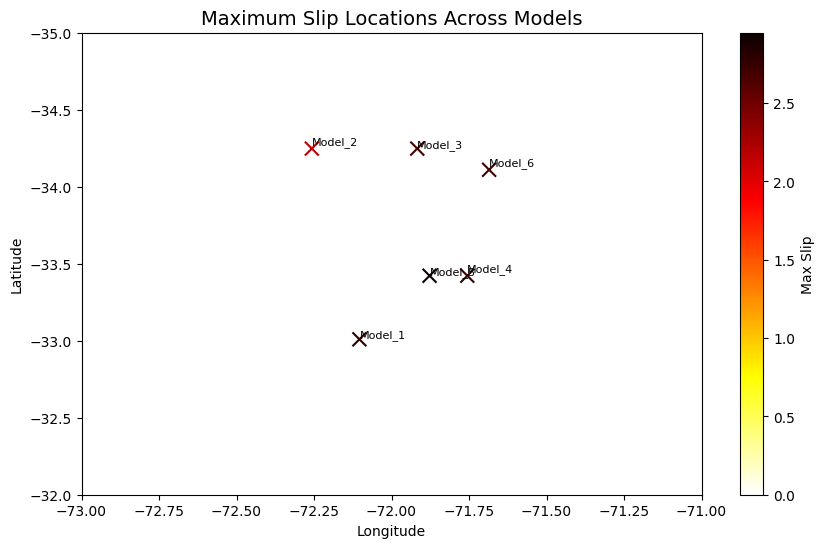

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Input slip distribution models from filtered CSV files
files = [
    '/Users/javieraalvarezvargas/Desktop/modelos/1906/filtrados70_2/slip_126_filtered.csv', '/Users/javieraalvarezvargas/Desktop/modelos/1906/filtrados70_2/slip_139_filtered.csv', '/Users/javieraalvarezvargas/Desktop/modelos/1906/filtrados70_2/slip_150_filtered.csv',
    '/Users/javieraalvarezvargas/Desktop/modelos/1906/filtrados70_2/slip_216_filtered.csv', '/Users/javieraalvarezvargas/Desktop/modelos/1906/filtrados70_2/slip_367_filtered.csv', '/Users/javieraalvarezvargas/Desktop/modelos/1906/filtrados70_2/slip_1030_filtered.csv'
]

# List
max_slip_positions = []

# Extract maximum slip values and their coordinates from each model
for i, file in enumerate(files):
    df = pd.read_csv(file, header=None)  # Raw data import
    max_slip = df[2].max()  # Identify maximum slip value in column 2
    max_row = df[df[2] == max_slip].iloc[0]  # Extract coordinates of maximum slip
    max_slip_positions.append({
        "Model": f'Model_{i + 1}',
        "Max_Slip": max_slip,
        "Lat": max_row[1],  # Latitude coordinate
        "Lon": max_row[0]   # Longitude coordinate
    })

# Convert to DataFrame for analysis
max_slip_positions_df = pd.DataFrame(max_slip_positions)

##################################

#PLOT

# Plot maximum slip locations with spatial distribution ('x')
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    max_slip_positions_df['Lon'], max_slip_positions_df['Lat'], 
    c=max_slip_positions_df['Max_Slip'], cmap='hot_r', s=100, edgecolor='black', marker='x',
    vmin=0
)

# Add model labels with offset to prevent overlap
for i, txt in enumerate(max_slip_positions_df['Model']):
    offset = 0.01 if i % 2 == 0 else -0.01  # Alternate label positions
    plt.annotate(
        txt, (max_slip_positions_df['Lon'][i], max_slip_positions_df['Lat'][i] + offset), 
        fontsize=8, ha='left', va='bottom'
    )

# Configure plot aesthetics
plt.title('Maximum Slip Locations Across Models', fontsize=14)
plt.xlabel('Longitude')
plt.xlim(-73,-71)
plt.ylim(-32,-35)
plt.ylabel('Latitude')
plt.colorbar(scatter, label='Max Slip')
# Export high-resolution figure
plt.savefig('maximumslip_location_1906.png', dpi=300, bbox_inches='tight')
plt.show()

# Uncertainty Analysis of Slip Distribution Models

### model_slip: 
Represents the slip values of the current model in the iteration, extracted from column 2 of each model file (such as model1, model2, etc.).

### mean_slip:
Represents the average slip values previously calculated across all models

### Analysis Workflow:
----------------
1. Extract slip values from target model
2. Generate spatial cluster analysis based on coordinates and maximum slip
3. Compare cluster values against mean slip distribution using MSE 
   to identify optimal model performance

Note: This analysis identifies spatial patterns and variations in slip 
distribution across multiple model iterations

/Users/javieraalvarezvargas/opt/anaconda3/envs/ads/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centroides de los clusters:
Cluster 0: Lat = -33.28438461538461, Lon = -71.9121430471996
Cluster 1: Lat = -34.20182051282051, Lon = -71.95305726320484


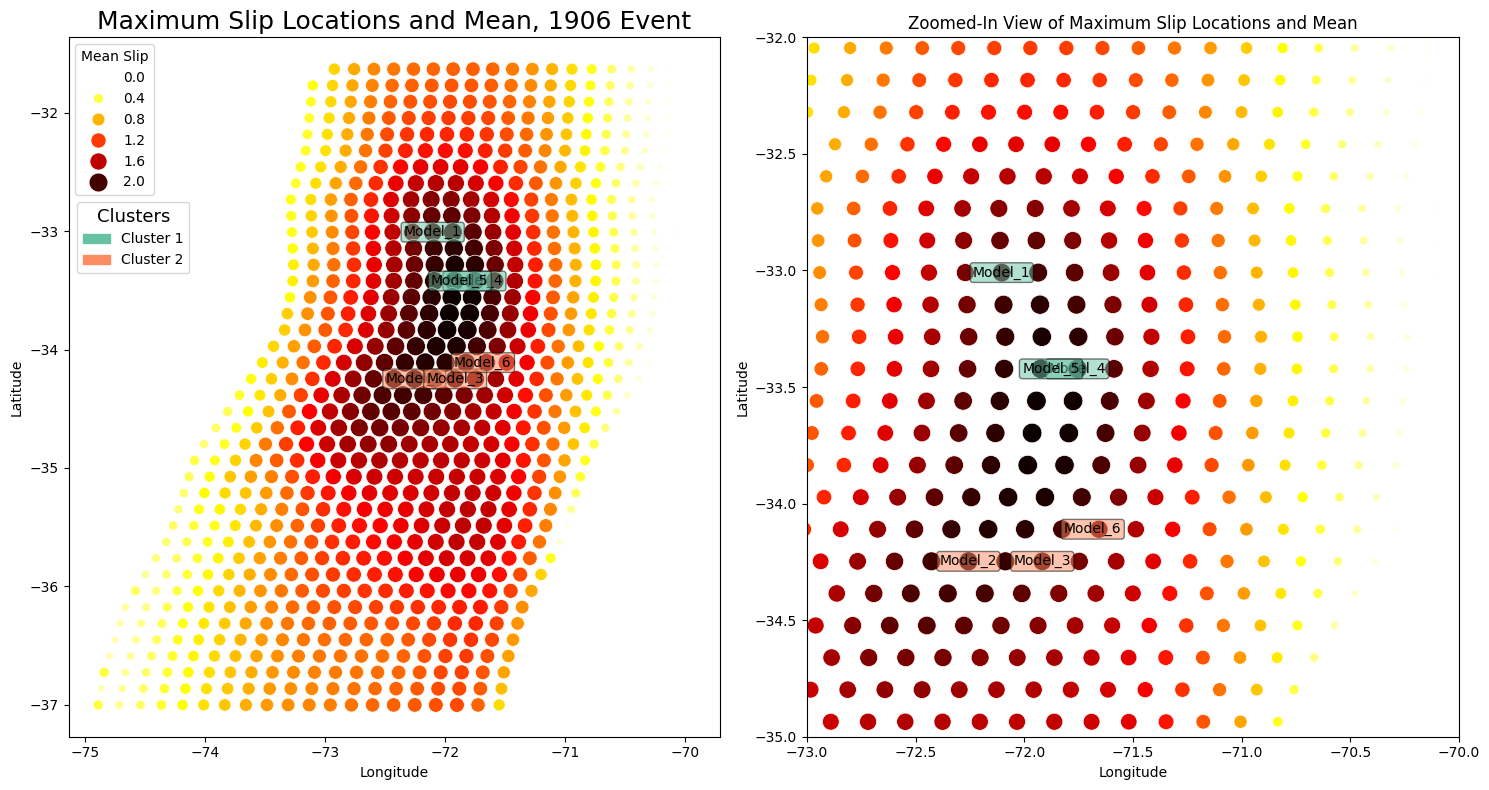

Cluster
0    3
1    3
dtype: int64
El mejor modelo en términos de proximidad a la coordenada media y máximo slip del Cluster 1 es Model_5
MSE Coordenadas: 0.010076, MSE Max Slip: 0.012669
     Model  MSE_Coordinates  MSE_Max_Slip
2  Model_5         0.010076      0.012669
1  Model_4         0.021731      0.005248
0  Model_1         0.056201      0.001609
El mejor modelo en términos de proximidad a la coordenada media y máximo slip del Cluster 2 es Model_3
MSE Coordenadas: 0.001702, MSE Max Slip: 0.027430
     Model  MSE_Coordinates  MSE_Max_Slip
1  Model_3         0.001702      0.027430
2  Model_6         0.040099      0.034597
0  Model_2         0.047255      0.123638


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
from sklearn.metrics import mean_squared_error

# Assuming you already have the DataFrames 'max_slip_positions_df' and 'slip_df'


# Step 1: Extract maximum slip positions (Lat and Lon)
X = max_slip_positions_df[['Lat', 'Lon']].values

# Step 2: Apply K-Means to find 3 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
max_slip_positions_df['Cluster'] = kmeans.fit_predict(X)

# Step 3: Define custom color palette (green, blue, yellow)
centroids = kmeans.cluster_centers_
print("Centroides de los clusters:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}: Lat = {centroid[0]}, Lon = {centroid[1]}")

# Step 4: Complete Plot - clusters
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

scatter = sns.scatterplot(x='Lon', y='Lat', size='Mean_Slip', hue='Mean_Slip', sizes=(20, 200), 
                          palette='hot_r', data=slip_df, legend=True, ax=ax1)

cluster_colors = ['#66c2a5', '#fc8d62']
for i, row in max_slip_positions_df.iterrows():
    cluster_id = row['Cluster']
    color = cluster_colors[cluster_id]
    ax1.annotate(row['Model'], (row['Lon'], row['Lat']), fontsize=10, ha='center', va='center', 
                 bbox=dict(facecolor=color, edgecolor='black', boxstyle='round,pad=0.2', alpha=0.5))

ax1.set_title('Maximum Slip Locations and Mean, 1906 Event', fontsize=18)
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

sns.scatterplot(x='Lon', y='Lat', size='Mean_Slip', hue='Mean_Slip', sizes=(20, 200), 
                palette='hot_r', data=slip_df, legend=False, ax=ax2)
for i, row in max_slip_positions_df.iterrows():
    cluster_id = row['Cluster']
    color = cluster_colors[cluster_id]
    ax2.annotate(row['Model'], (row['Lon'], row['Lat']), fontsize=10, ha='center', va='center', 
                 bbox=dict(facecolor=color, edgecolor='black', boxstyle='round,pad=0.2', alpha=0.5))

ax2.set_xlim(-73, -70)
ax2.set_ylim(-35, -32)
ax2.set_title('Zoomed-In View of Maximum Slip Locations and Mean')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')

# Step 6: Add custom legend for clusters below Mean Slip legend

# Create patch set for each color and cluster
handles_clusters = [Patch(color=color, label=label) for color, label in zip(cluster_colors, ['Cluster 1', 'Cluster 2'])]
handles_mean_slip, labels_mean_slip = scatter.get_legend_handles_labels()
ax1.legend(handles=handles_mean_slip, labels=labels_mean_slip, loc='upper left', fontsize=10, title='Mean Slip')
fig.legend(handles=handles_clusters, loc='upper left', bbox_to_anchor=(0.05, 0.75), fontsize=10, title="Clusters", title_fontsize='13')

plt.tight_layout()
plt.savefig('cluster_1906.png', dpi=300, bbox_inches='tight')
plt.show()

print(max_slip_positions_df.groupby('Cluster').size())

##############################################################
# ======== Calculate Mean Coordinates and Max Slip for Cluster 1 ======== #
##############################################################

# List of model DataFrames
models = [model1, model2, model3, model4, model5, model6]  # Ajustar para tener todos los modelos

# ======== Cálculo del Mean Coordinates y Max Slip de Cluster 1 ======== #
# Filter models belonging to Cluster 1
cluster_1_models = max_slip_positions_df[max_slip_positions_df['Cluster'] == 0]  # Cluster 1 tiene ID = 0

# Calcular la coordenada media de máximo slip en Cluster 1
mean_lat_cluster_1 = cluster_1_models['Lat'].mean()
mean_lon_cluster_1 = cluster_1_models['Lon'].mean()
mean_coordinates_cluster_1 = np.array([mean_lat_cluster_1, mean_lon_cluster_1])

# Step 1: Calculate mean coordinate of maximum slip in Cluster 1
mean_max_slip_cluster_1 = cluster_1_models['Max_Slip'].mean()

# Initialize list to store MSE results for each model in Cluster 1
results_cluster_1 = []

# Step 2: Calculate MSE between maximum slip coordinate and maximum slip of each model vs. cluster average maximum slip
for i, row in cluster_1_models.iterrows():
    model_coordinates = np.array([row['Lat'], row['Lon']])
    mse_coordinates = mean_squared_error(mean_coordinates_cluster_1, model_coordinates)
    
    model_number = int(row['Model'].split('_')[1]) - 1
    if model_number < len(models):
        model_max_slip = models[model_number].iloc[:, 2].max()
        mse_max_slip = mean_squared_error([mean_max_slip_cluster_1], [model_max_slip])
        results_cluster_1.append((row['Model'], mse_coordinates, mse_max_slip))
    else:
        print(f"Advertencia: El modelo {row['Model']} no está definido en la lista de modelos.")

# Create DataFrame with MSE results
mse_df_cluster_1 = pd.DataFrame(results_cluster_1, columns=['Model', 'MSE_Coordinates', 'MSE_Max_Slip'])
mse_df_cluster_1_sorted = mse_df_cluster_1.sort_values(by=['MSE_Coordinates', 'MSE_Max_Slip'])

best_model_cluster_1 = mse_df_cluster_1_sorted.iloc[0]
print(f"El mejor modelo en términos de proximidad a la coordenada media y máximo slip del Cluster 1 es {best_model_cluster_1['Model']}")
print(f"MSE Coordenadas: {best_model_cluster_1['MSE_Coordinates']:.6f}, MSE Max Slip: {best_model_cluster_1['MSE_Max_Slip']:.6f}")

print(mse_df_cluster_1_sorted)

# ======== Calculate Mean Coordinates and Max Slip for Cluster 2 ======== #

# Models of Cluster 2
cluster_2_models = max_slip_positions_df[max_slip_positions_df['Cluster'] == 1]

mean_lat_cluster_2 = cluster_2_models['Lat'].mean()
mean_lon_cluster_2 = cluster_2_models['Lon'].mean()
mean_coordinates_cluster_2 = np.array([mean_lat_cluster_2, mean_lon_cluster_2])
mean_max_slip_cluster_2 = cluster_2_models['Max_Slip'].mean()

results_cluster_2 = []

for i, row in cluster_2_models.iterrows():
    model_coordinates = np.array([row['Lat'], row['Lon']])
    mse_coordinates = mean_squared_error(mean_coordinates_cluster_2, model_coordinates)
    
    model_number = int(row['Model'].split('_')[1]) - 1
    if model_number < len(models):
        model_max_slip = models[model_number].iloc[:, 2].max()
        mse_max_slip = mean_squared_error([mean_max_slip_cluster_2], [model_max_slip])
        results_cluster_2.append((row['Model'], mse_coordinates, mse_max_slip))
    else:
        print(f"Advertencia: El modelo {row['Model']} no está definido en la lista de modelos.")

mse_df_cluster_2 = pd.DataFrame(results_cluster_2, columns=['Model', 'MSE_Coordinates', 'MSE_Max_Slip'])
mse_df_cluster_2_sorted = mse_df_cluster_2.sort_values(by=['MSE_Coordinates', 'MSE_Max_Slip'])

best_model_cluster_2 = mse_df_cluster_2_sorted.iloc[0]
print(f"El mejor modelo en términos de proximidad a la coordenada media y máximo slip del Cluster 2 es {best_model_cluster_2['Model']}")
print(f"MSE Coordenadas: {best_model_cluster_2['MSE_Coordinates']:.6f}, MSE Max Slip: {best_model_cluster_2['MSE_Max_Slip']:.6f}")

print(mse_df_cluster_2_sorted)

